<a href="https://colab.research.google.com/github/saifur710/Demand_Prediction/blob/main/Bike_Sharing%20Demand%20Aalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
#Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from plotnine import ggplot, aes, geom_line
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import os
import datetime as dt
from pandas.core.frame import DataFrame

In [ ]:
#Import data
df1 = pd.read_csv("demand_data.csv")
df2 = pd.read_csv("weather_data.csv")


In [ ]:
#Exploratory_data_for_demand
df1.columns

Index(['Departure', 'Return', 'Departure station id', 'Departure station name',
       'Return station id', 'Return station name', 'Covered distance (m)',
       'Duration (sec.)'],
      dtype='object')

In [ ]:
df1.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
0,2021-04-30T23:59:54,2021-05-01T00:08:15,16,Liisanpuistikko,2,Laivasillankatu,1885.0,499.0
1,2021-04-30T23:59:52,2021-05-01T00:16:16,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3359.0,984.0
2,2021-04-30T23:59:52,2021-05-01T00:13:40,4,Viiskulma,33,Kauppakorkeakoulu,1633.0,824.0
3,2021-04-30T23:59:43,2021-05-01T00:23:22,133,Paavalinpuisto,241,Agronominkatu,6459.0,1418.0
4,2021-04-30T23:59:41,2021-05-01T00:16:15,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3210.0,990.0


In [ ]:
df1.tail()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.)
2862097,2021-10-01T00:03:21,2021-10-01T00:21:56,23,Kiasma,142,Koskelantie,4772.0,NaN
2862098,2021-10-01T00:02:38,2021-10-01T00:15:54,19,Rautatientori / itä,58,Lauttasaarensilta,3493.0,NaN
2862099,2021-10-01T00:01:48,2021-10-01T00:11:19,96,Huopalahdentie,208,Valimotie,2109.0,NaN
2862100,2021-10-01T00:01:16,2021-10-01T00:58:59,8,Vanha kirkkopuisto,133,Paavalinpuisto,5883.0,NaN
2862101,2021-10-01T00:01:09,2021-10-01T00:11:49,29,Baana,40,Hakaniemi (M),3055.0,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862102 entries, 0 to 2862101
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Departure               object 
 1   Return                  object 
 2   Departure station id    int64  
 3   Departure station name  object 
 4   Return station id       int64  
 5   Return station name     object 
 6   Covered distance (m)    float64
 7   Duration (sec.)         float64
dtypes: float64(2), int64(2), object(4)
memory usage: 174.7+ MB


In [ ]:
df1.shape

(2862102, 8)

In [ ]:
df1.isnull().sum()

Departure                      0
Return                         0
Departure station id           0
Departure station name         0
Return station id              0
Return station name            0
Covered distance (m)        2395
Duration (sec.)           209240
dtype: int64

<AxesSubplot:>

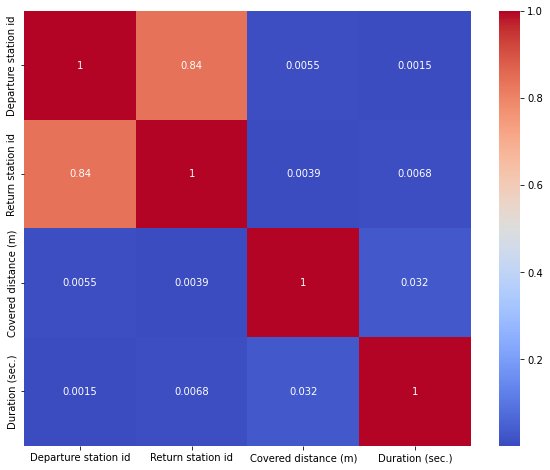

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df1.corr()),cmap='coolwarm',annot=True)

In [ ]:
#Exploratory_data_for_weather


In [ ]:
df2.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Helsinki,Finland",2021-04-01T00:00:00,3.2,-0.5,-1.4,71.77,0.0,0,NaN,0,...,1012.2,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
1,"Helsinki,Finland",2021-04-01T01:00:00,2.5,-1.8,-1.5,74.87,0.0,0,NaN,0,...,1012.3,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
2,"Helsinki,Finland",2021-04-01T02:00:00,2.0,-2.4,-1.9,75.42,0.0,0,NaN,0,...,1012.1,33.8,49.7,0.0,NaN,0.0,NaN,Partially cloudy,partly-cloudy-night,"02985199999,02998099999,02983099999,0275909999..."
3,"Helsinki,Finland",2021-04-01T03:00:00,1.5,-3.1,-2.2,76.70,0.0,0,NaN,0,...,1012.1,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
4,"Helsinki,Finland",2021-04-01T04:00:00,1.0,-3.2,-2.2,79.39,0.0,0,NaN,0,...,1011.8,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."


In [ ]:
df2.tail()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
5132,"Helsinki,Finland",2021-10-31T19:00:00,9.8,7.2,7.6,86.04,0.0,0,NaN,0,...,1009.4,98.3,12.8,NaN,NaN,NaN,NaN,Overcast,cloudy,"02985199999,02998099999,02983099999,0275909999..."
5133,"Helsinki,Finland",2021-10-31T20:00:00,9.8,6.9,7.6,86.35,0.0,0,NaN,0,...,1009.7,99.9,13.0,NaN,NaN,NaN,NaN,Overcast,cloudy,"02985199999,02998099999,02983099999,0275909999..."
5134,"Helsinki,Finland",2021-10-31T21:00:00,9.6,7.0,7.9,88.67,0.0,0,NaN,0,...,1009.7,91.9,11.8,NaN,NaN,NaN,NaN,Overcast,cloudy,"02985199999,02998099999,02983099999,0275909999..."
5135,"Helsinki,Finland",2021-10-31T22:00:00,9.7,7.1,8.4,91.66,0.0,0,NaN,0,...,1010.0,90.3,8.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"02985199999,02998099999,02983099999,0275909999..."
5136,"Helsinki,Finland",2021-10-31T23:00:00,10.1,10.1,7.8,85.95,0.0,0,NaN,0,...,1010.6,98.3,13.9,NaN,NaN,NaN,NaN,Overcast,cloudy,"02985199999,02998099999,02983099999,0275909999..."


<AxesSubplot:>

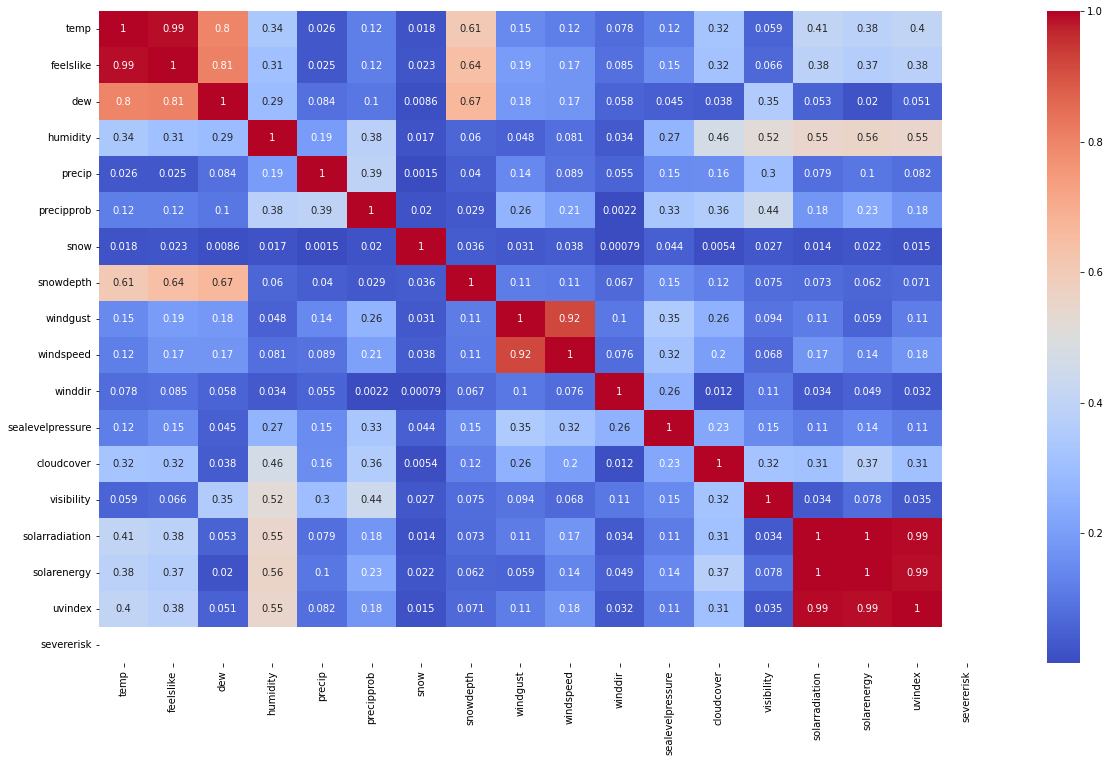

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(abs(df2.corr()),cmap='coolwarm',annot=True)

In [ ]:
df2.columns


Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5137 non-null   object 
 1   datetime          5137 non-null   object 
 2   temp              5137 non-null   float64
 3   feelslike         5137 non-null   float64
 4   dew               5137 non-null   float64
 5   humidity          5137 non-null   float64
 6   precip            5137 non-null   float64
 7   precipprob        5137 non-null   int64  
 8   preciptype        733 non-null    object 
 9   snow              5137 non-null   int64  
 10  snowdepth         5137 non-null   int64  
 11  windgust          5035 non-null   float64
 12  windspeed         5137 non-null   float64
 13  winddir           5137 non-null   int64  
 14  sealevelpressure  5120 non-null   float64
 15  cloudcover        5137 non-null   float64
 16  visibility        5137 non-null   float64


In [ ]:
df2.shape

(5137, 24)

In [ ]:
df2.isnull().sum()

name                   0
datetime               0
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
preciptype          4404
snow                   0
snowdepth              0
windgust             102
windspeed              0
winddir                0
sealevelpressure      17
cloudcover             0
visibility             0
solarradiation       410
solarenergy         1537
uvindex              410
severerisk          5137
conditions             0
icon                   0
stations               0
dtype: int64

In [ ]:
df1.columns

Index(['Departure', 'Return', 'Departure station id', 'Departure station name',
       'Return station id', 'Return station name', 'Covered distance (m)',
       'Duration (sec.)'],
      dtype='object')

In [ ]:
df2.isnull().sum()

name                   0
datetime               0
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
preciptype          4404
snow                   0
snowdepth              0
windgust             102
windspeed              0
winddir                0
sealevelpressure      17
cloudcover             0
visibility             0
solarradiation       410
solarenergy         1537
uvindex              410
severerisk          5137
conditions             0
icon                   0
stations               0
dtype: int64

In [ ]:
# Data Description

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Departure station id,2862102.0,182.668684,194.357093,1.0,44.0,113.0,251.0,999.0
Return station id,2862102.0,182.685590,194.791292,1.0,44.0,113.0,251.0,999.0
Covered distance (m),2859707.0,2332.844667,14190.441075,-4294127.0,1110.0,1947.0,3242.0,3680771.0
Duration (sec.),2652862.0,1033.769977,11412.229807,0.0,377.0,645.0,1050.0,4889729.0


In [ ]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,5137.0,13.004283,6.554558,-2.50,8.20,12.50,17.90,30.300
feelslike,5137.0,12.008040,7.791260,-6.50,5.90,12.50,17.90,31.600
dew,5137.0,7.756843,6.191797,-10.80,3.30,8.00,12.40,21.700
humidity,5137.0,72.895264,17.417980,18.49,60.44,75.43,87.57,100.000
precip,5137.0,0.073307,0.455639,0.00,0.00,0.00,0.00,17.946
precipprob,5137.0,14.269029,34.979078,0.00,0.00,0.00,0.00,100.000
snow,5137.0,0.000389,0.019730,0.00,0.00,0.00,0.00,1.000
snowdepth,5137.0,0.228927,0.420183,0.00,0.00,0.00,0.00,1.000
windgust,5035.0,26.873366,11.504997,3.60,18.10,25.30,32.70,82.200
windspeed,5137.0,14.968776,6.479993,1.30,10.80,14.50,18.70,42.900


In [ ]:
#Copy_Data_Set

In [ ]:
copy_df1= df1.copy()
copy_df2 = df2.copy()

In [ ]:
#Adding_colum

In [ ]:
copy_df1['Departure_new'] = pd.to_datetime(copy_df1['Departure'])
copy_df1.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new
0,2021-04-30T23:59:54,2021-05-01T00:08:15,16,Liisanpuistikko,2,Laivasillankatu,1885.0,499.0,2021-04-30 23:59:54
1,2021-04-30T23:59:52,2021-05-01T00:16:16,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3359.0,984.0,2021-04-30 23:59:52
2,2021-04-30T23:59:52,2021-05-01T00:13:40,4,Viiskulma,33,Kauppakorkeakoulu,1633.0,824.0,2021-04-30 23:59:52
3,2021-04-30T23:59:43,2021-05-01T00:23:22,133,Paavalinpuisto,241,Agronominkatu,6459.0,1418.0,2021-04-30 23:59:43
4,2021-04-30T23:59:41,2021-05-01T00:16:15,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3210.0,990.0,2021-04-30 23:59:41


In [ ]:
#Spliting_date_column

In [ ]:
date_colum = pd.DatetimeIndex(copy_df1['Departure_new'])
copy_df1['Departure_Year']=date_colum.year
copy_df1['Departure_Month']=date_colum.month
copy_df1['Departure_Day'] = date_colum.day
copy_df1['Week_days'] = date_colum.day_name()
copy_df1['Departure_hour'] = date_colum.hour
copy_df1['Departure_minutes'] = date_colum.minute

copy_df1.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes
0,2021-04-30T23:59:54,2021-05-01T00:08:15,16,Liisanpuistikko,2,Laivasillankatu,1885.0,499.0,2021-04-30 23:59:54,2021,4,30,Friday,23,59
1,2021-04-30T23:59:52,2021-05-01T00:16:16,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3359.0,984.0,2021-04-30 23:59:52,2021,4,30,Friday,23,59
2,2021-04-30T23:59:52,2021-05-01T00:13:40,4,Viiskulma,33,Kauppakorkeakoulu,1633.0,824.0,2021-04-30 23:59:52,2021,4,30,Friday,23,59
3,2021-04-30T23:59:43,2021-05-01T00:23:22,133,Paavalinpuisto,241,Agronominkatu,6459.0,1418.0,2021-04-30 23:59:43,2021,4,30,Friday,23,59
4,2021-04-30T23:59:41,2021-05-01T00:16:15,20,Kaisaniemenpuisto,112,Rautatieläisenkatu,3210.0,990.0,2021-04-30 23:59:41,2021,4,30,Friday,23,59


In [ ]:

copy_df1.tail()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes
2862097,2021-10-01T00:03:21,2021-10-01T00:21:56,23,Kiasma,142,Koskelantie,4772.0,NaN,2021-10-01 00:03:21,2021,10,1,Friday,0,3
2862098,2021-10-01T00:02:38,2021-10-01T00:15:54,19,Rautatientori / itä,58,Lauttasaarensilta,3493.0,NaN,2021-10-01 00:02:38,2021,10,1,Friday,0,2
2862099,2021-10-01T00:01:48,2021-10-01T00:11:19,96,Huopalahdentie,208,Valimotie,2109.0,NaN,2021-10-01 00:01:48,2021,10,1,Friday,0,1
2862100,2021-10-01T00:01:16,2021-10-01T00:58:59,8,Vanha kirkkopuisto,133,Paavalinpuisto,5883.0,NaN,2021-10-01 00:01:16,2021,10,1,Friday,0,1
2862101,2021-10-01T00:01:09,2021-10-01T00:11:49,29,Baana,40,Hakaniemi (M),3055.0,NaN,2021-10-01 00:01:09,2021,10,1,Friday,0,1


In [ ]:
copy_df1['Departure station name']

0              Liisanpuistikko
1            Kaisaniemenpuisto
2                    Viiskulma
3               Paavalinpuisto
4            Kaisaniemenpuisto
                  ...         
2862097                 Kiasma
2862098    Rautatientori / itä
2862099         Huopalahdentie
2862100     Vanha kirkkopuisto
2862101                  Baana
Name: Departure station name, Length: 2862102, dtype: object

In [ ]:
#Sorting_date

In [ ]:
#copy_df1 = copy_df1.sort_values(by='Departure_new', ignore_index= True)
df1_sort = copy_df1.sort_values(by='Departure_new', ignore_index= True)
df1_sort.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes
0,2021-04-01T05:06:37,2021-04-01T17:57:32,9,Erottajan aukio,105,Tilkantori,5341.0,1606.0,2021-04-01 05:06:37,2021,4,1,Thursday,5,6
1,2021-04-01T06:05:17,2021-04-01T06:05:39,30,Itämerentori,30,Itämerentori,2.0,18.0,2021-04-01 06:05:17,2021,4,1,Thursday,6,5
2,2021-04-01T06:06:02,2021-04-01T06:11:19,68,Albertinkatu,26,Kamppi (M),977.0,323.0,2021-04-01 06:06:02,2021,4,1,Thursday,6,6
3,2021-04-01T06:06:04,2021-04-01T08:05:35,57,Lauttasaaren ostoskeskus,117,Brahen puistikko,0.0,7168.0,2021-04-01 06:06:04,2021,4,1,Thursday,6,6
4,2021-04-01T06:13:36,2021-04-01T06:21:53,133,Paavalinpuisto,126,Kalasatama (M),1760.0,493.0,2021-04-01 06:13:36,2021,4,1,Thursday,6,13


In [ ]:
df1_sort.tail()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes
2862097,2021-10-31T23:57:43,2021-10-31T23:59:31,133,Paavalinpuisto,133,Paavalinpuisto,330.0,NaN,2021-10-31 23:57:43,2021,10,31,Sunday,23,57
2862098,2021-10-31T23:58:30,2021-11-01T00:11:49,74,Rajasaarentie,30,Itämerentori,3206.0,NaN,2021-10-31 23:58:30,2021,10,31,Sunday,23,58
2862099,2021-10-31T23:58:50,2021-11-01T03:32:30,31,Marian sairaala,31,Marian sairaala,334.0,NaN,2021-10-31 23:58:50,2021,10,31,Sunday,23,58
2862100,2021-10-31T23:59:17,2021-11-01T00:35:34,543,Otaranta,30,Itämerentori,7177.0,NaN,2021-10-31 23:59:17,2021,10,31,Sunday,23,59
2862101,2021-10-31T23:59:26,2021-11-01T00:25:13,545,Sähkömies,31,Marian sairaala,7951.0,NaN,2021-10-31 23:59:26,2021,10,31,Sunday,23,59


In [ ]:
df1_sort['Departure'] = pd.to_datetime(df1_sort['Departure'])
#df1_sort['Return'] = pd.to_datetime(df1_sort['Return'])

In [ ]:
df1_sort['hour'] = df1_sort['Departure'].dt.hour

In [ ]:
hourly_demand = df1_sort.groupby('hour').size().reset_index(name='hourly_demand')


In [ ]:
dfDemand = pd.merge(df1_sort, hourly_demand, on='hour', how='left')
dfDemand.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes,hour,hourly_demand
0,2021-04-01 05:06:37,2021-04-01T17:57:32,9,Erottajan aukio,105,Tilkantori,5341.0,1606.0,2021-04-01 05:06:37,2021,4,1,Thursday,5,6,5,14788
1,2021-04-01 06:05:17,2021-04-01T06:05:39,30,Itämerentori,30,Itämerentori,2.0,18.0,2021-04-01 06:05:17,2021,4,1,Thursday,6,5,6,35302
2,2021-04-01 06:06:02,2021-04-01T06:11:19,68,Albertinkatu,26,Kamppi (M),977.0,323.0,2021-04-01 06:06:02,2021,4,1,Thursday,6,6,6,35302
3,2021-04-01 06:06:04,2021-04-01T08:05:35,57,Lauttasaaren ostoskeskus,117,Brahen puistikko,0.0,7168.0,2021-04-01 06:06:04,2021,4,1,Thursday,6,6,6,35302
4,2021-04-01 06:13:36,2021-04-01T06:21:53,133,Paavalinpuisto,126,Kalasatama (M),1760.0,493.0,2021-04-01 06:13:36,2021,4,1,Thursday,6,13,6,35302


In [ ]:
# calculate the hourly demand by counting the number of rows per hour and station
hourlyStationDmnd = df1_sort.groupby(['Departure station name', 'hour']).size().reset_index(name='hourly_demand')

In [ ]:
dfHourlyDmnd = pd.merge(df1_sort, hourlyStationDmnd, on=['Departure station name', 'hour'], how='left')

dfHourlyDmnd.head()

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,Departure_Month,Departure_Day,Week_days,Departure_hour,Departure_minutes,hour,hourly_demand
0,2021-04-01 05:06:37,2021-04-01T17:57:32,9,Erottajan aukio,105,Tilkantori,5341.0,1606.0,2021-04-01 05:06:37,2021,4,1,Thursday,5,6,5,13
1,2021-04-01 06:05:17,2021-04-01T06:05:39,30,Itämerentori,30,Itämerentori,2.0,18.0,2021-04-01 06:05:17,2021,4,1,Thursday,6,5,6,584
2,2021-04-01 06:06:02,2021-04-01T06:11:19,68,Albertinkatu,26,Kamppi (M),977.0,323.0,2021-04-01 06:06:02,2021,4,1,Thursday,6,6,6,327
3,2021-04-01 06:06:04,2021-04-01T08:05:35,57,Lauttasaaren ostoskeskus,117,Brahen puistikko,0.0,7168.0,2021-04-01 06:06:04,2021,4,1,Thursday,6,6,6,186
4,2021-04-01 06:13:36,2021-04-01T06:21:53,133,Paavalinpuisto,126,Kalasatama (M),1760.0,493.0,2021-04-01 06:13:36,2021,4,1,Thursday,6,13,6,283


In [ ]:
station_demand = dfHourlyDmnd.groupby('Departure station name')['hourly_demand'].count().reset_index(name='station_demand')

In [ ]:
top_stations = station_demand.sort_values(by='station_demand', ascending=False).head(10)

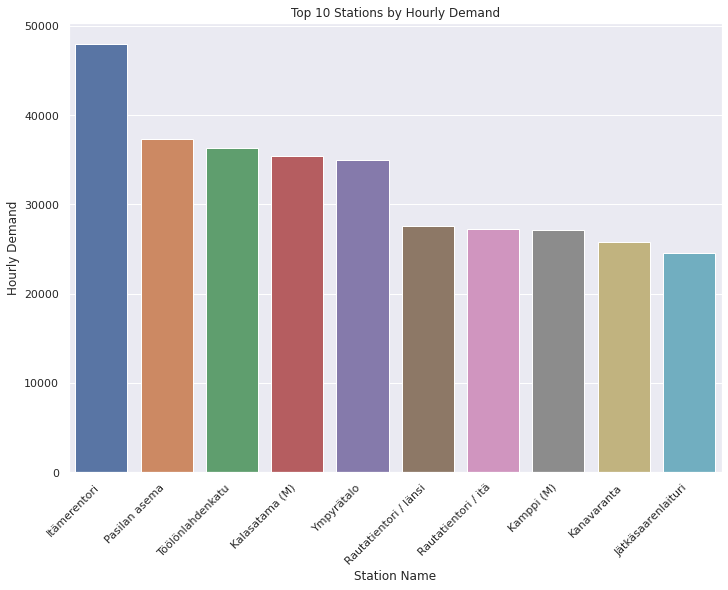

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Departure station name', y='station_demand', data=top_stations)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Station Name')
plt.ylabel('Hourly Demand')
plt.title('Top 10 Stations by Hourly Demand')
plt.show()

In [ ]:
#count_data

In [ ]:
df1_count = df1_sort[['Departure_Year','Departure_Month','Departure_Day','Departure_hour','Week_days']].reset_index()
df1_count = df1_count.drop(columns = 'index')
df1_count.head()

,Departure_Year,Departure_Month,Departure_Day,Departure_hour,Week_days
0,2021,4,1,5,Thursday
1,2021,4,1,6,Thursday
2,2021,4,1,6,Thursday
3,2021,4,1,6,Thursday
4,2021,4,1,6,Thursday


In [ ]:
df1_count.tail()

,Departure_Year,Departure_Month,Departure_Day,Departure_hour,Week_days
2862097,2021,10,31,23,Sunday
2862098,2021,10,31,23,Sunday
2862099,2021,10,31,23,Sunday
2862100,2021,10,31,23,Sunday
2862101,2021,10,31,23,Sunday


In [ ]:
#grouping_data

In [ ]:
hourly_pickup = df1_count.groupby(by=['Departure_Year','Departure_Month','Departure_Day','Departure_hour']).count()
hourly_pickup.head()

Week_days
Departure_Year Departure_Month Departure_Day Departure_hour           
2021           4               1             5                       1
                                             6                      33
                                             7                      82
                                             8                     176
                                             9                     147

In [ ]:
hourly_pickup.tail()

Week_days
Departure_Year Departure_Month Departure_Day Departure_hour           
2021           10              31            19                    244
                                             20                    209
                                             21                    114
                                             22                     70
                                             23                     43

In [ ]:
Total_Pickup_hourly = df1_count.groupby(['Departure_hour'],as_index=True)['Departure_hour'].count()
Total_Pickup_hourly

Departure_hour
0      48150
1      33094
2      22395
3      15354
4      10673
5      14788
6      35302
7      85101
8     122845
9     101796
10     97114
11    125061
12    149812
13    161560
14    179370
15    213229
16    261597
17    262128
18    237475
19    208279
20    179774
21    137294
22     94866
23     65045
Name: Departure_hour, dtype: int64

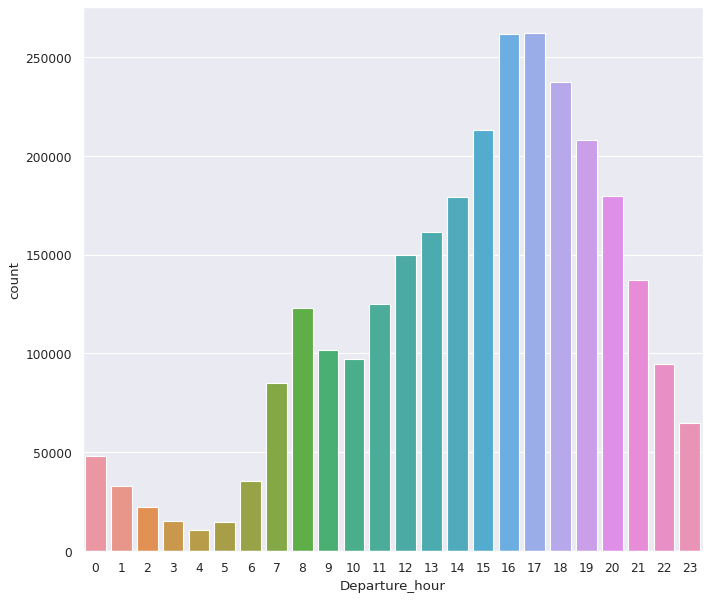

In [ ]:
plt.figure(figsize = (10,9) ,dpi = 80)
sns.countplot(x=df1_count['Departure_hour'])
plt.show()

In [ ]:
daily_pickup=df1_count.groupby(by=['Departure_Year','Departure_Month','Departure_Day']).count()
daily_pickup.head()

Departure_hour  Week_days
Departure_Year Departure_Month Departure_Day                           
2021           4               1                        5899       5899
                               2                        4969       4969
                               3                        6282       6282
                               4                        6183       6183
                               5                        2137       2137

In [ ]:
daily_pickup.tail()

Departure_hour  Week_days
Departure_Year Departure_Month Departure_Day                           
2021           10              27                       5325       5325
                               28                       5515       5515
                               29                       6744       6744
                               30                       5441       5441
                               31                       4989       4989

In [ ]:
Total_Pickup_Daily = df1_count.groupby(['Departure_Day'],as_index=True)['Departure_Day'].count()
Total_Pickup_Daily

Departure_Day
1      96264
2      98856
3      97391
4      95908
5      86335
6      95757
7      85820
8      96520
9      93570
10    101018
11    109931
12     98536
13    105110
14    102469
15     95802
16    108885
17     98274
18     93059
19     93872
20     93063
21     94770
22     98043
23     82265
24     85226
25     72263
26     70378
27     85658
28     90124
29     98692
30     87434
31     50809
Name: Departure_Day, dtype: int64

In [ ]:
split= df1_count ['Departure_Day']. str.split(" ")
split

AttributeError: ignored

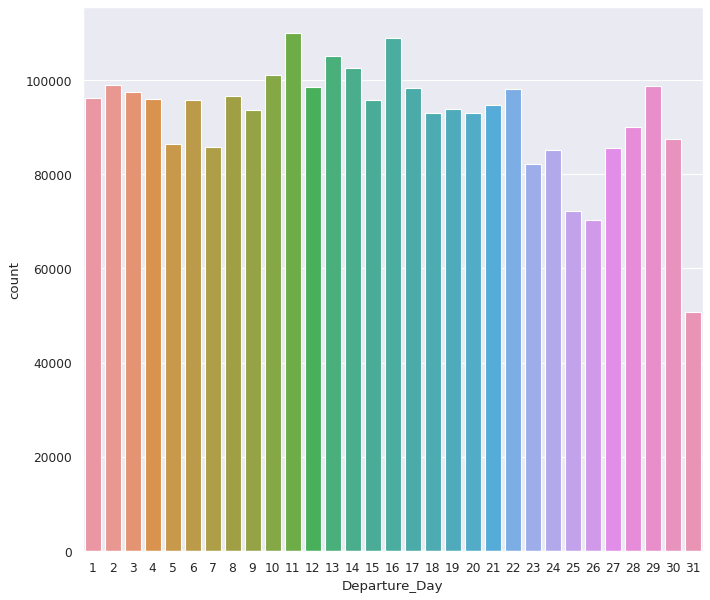

In [ ]:
plt.figure(figsize = (10,9) ,dpi = 80)
sns.countplot(x=df1_count['Departure_Day'])
plt.show()

In [ ]:
monthly_pickup=df1_count.groupby(by=['Departure_Year','Departure_Month']).count()
monthly_pickup

Departure_Day  Departure_hour  Week_days
Departure_Year Departure_Month                                          
2021           4                       274175          274175     274175
               5                       407338          407338     407338
               6                       611741          611741     611741
               7                       604422          604422     604422
               8                       435784          435784     435784
               9                       319402          319402     319402
               10                      209240          209240     209240

In [ ]:
Total_Pickup_Monthly = df1_count.groupby(['Departure_Month'], as_index=True)['Departure_Month'].count()
Total_Pickup_Monthly

Departure_Month
4     274175
5     407338
6     611741
7     604422
8     435784
9     319402
10    209240
Name: Departure_Month, dtype: int64

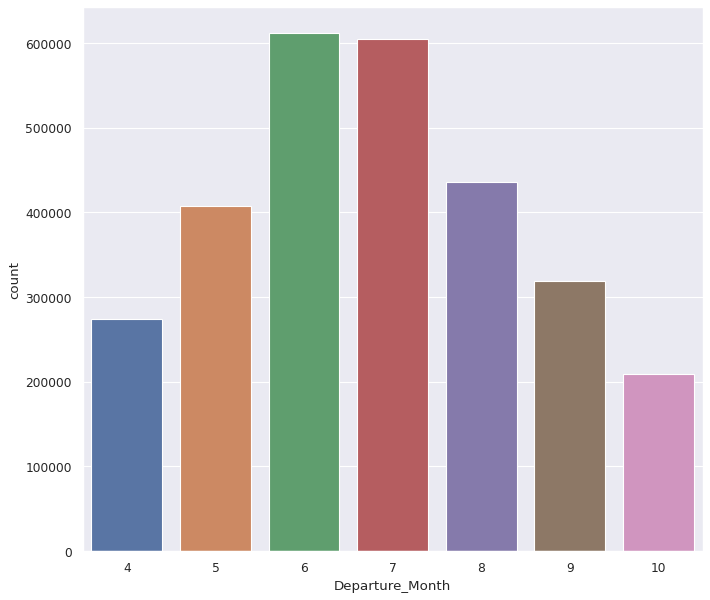

In [ ]:


plt.figure(figsize = (10,9) ,dpi = 80)
sns.countplot(x=df1_count['Departure_Month'])
plt.show()

In [ ]:
days_pickup=df1_count.groupby(by=['Departure_Year','Departure_Month','Week_days']).count()
days_pickup

Departure_Day  Departure_hour
Departure_Year Departure_Month Week_days                               
2021           4               Friday             39666           39666
                               Monday             32694           32694
                               Saturday           32628           32628
                               Sunday             38417           38417
                               Thursday           51003           51003
                               Tuesday            37923           37923
                               Wednesday          41844           41844
               5               Friday             55654           55654
                               Monday             62357           62357
                               Saturday           68905           68905
                               Sunday             65327           65327
                               Thursday           57283           57283
                               Tuesday            56168           56168
                               Wednesday          41644           41644
               6               Friday             83378           83378
                               Monday             82657           82657
                               Saturday           76510           76510
                               Sunday             66989           66989
                               Thursday           86595           86595
                               Tuesday           110624          110624
                               Wednesday         104988          104988
               7               Friday             91558           91558
                               Monday             82368           82368
                               Saturday           98610           98610
                               Sunday             74552           74552
                               Thursday          100288          100288
                               Tuesday            80003           80003
                               Wednesday          77043           77043
               8               Friday             67526           67526
                               Monday             77577           77577
                               Saturday           44031           44031
                               Sunday             62069           62069
                               Thursday           57400           57400
                               Tuesday            76607           76607
                               Wednesday          50574           50574
               9               Friday             45690           45690
                               Monday             43324           43324
                               Saturday           37678           37678
                               Sunday             30996           30996
                               Thursday           59240           59240
                               Tuesday            43989           43989
                               Wednesday          58485           58485
               10              Friday             33947           33947
                               Monday             30394           30394
                               Saturday           32654           32654
                               Sunday             30231           30231
                               Thursday           27965           27965
                               Tuesday            27509           27509
                               Wednesday          26540           26540

In [ ]:
Total_Pickup_weekdays= df1_count.groupby(['Week_days'],as_index=True)['Week_days'].count()
Total_Pickup_weekdays

Week_days
Friday       417419
Monday       411371
Saturday     391016
Sunday       368581
Thursday     439774
Tuesday      432823
Wednesday    401118
Name: Week_days, dtype: int64

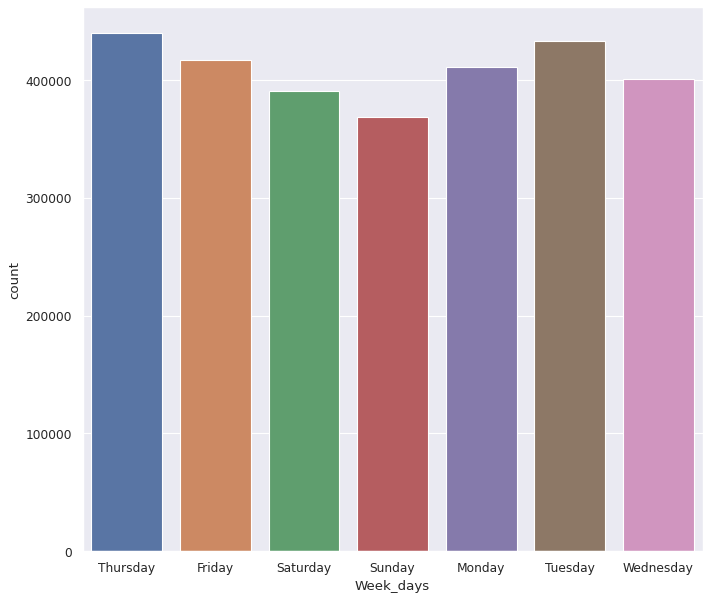

In [ ]:
plt.figure(figsize = (10,9) ,dpi = 80)
sns.countplot(x=df1_count['Week_days'])
plt.show()

In [ ]:
#importing weather data
Del_col= df2.copy()
Del_col.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Helsinki,Finland",2021-04-01T00:00:00,3.2,-0.5,-1.4,71.77,0.0,0,NaN,0,...,1012.2,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
1,"Helsinki,Finland",2021-04-01T01:00:00,2.5,-1.8,-1.5,74.87,0.0,0,NaN,0,...,1012.3,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
2,"Helsinki,Finland",2021-04-01T02:00:00,2.0,-2.4,-1.9,75.42,0.0,0,NaN,0,...,1012.1,33.8,49.7,0.0,NaN,0.0,NaN,Partially cloudy,partly-cloudy-night,"02985199999,02998099999,02983099999,0275909999..."
3,"Helsinki,Finland",2021-04-01T03:00:00,1.5,-3.1,-2.2,76.70,0.0,0,NaN,0,...,1012.1,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."
4,"Helsinki,Finland",2021-04-01T04:00:00,1.0,-3.2,-2.2,79.39,0.0,0,NaN,0,...,1011.8,0.0,49.7,0.0,NaN,0.0,NaN,Clear,clear-night,"02985199999,02998099999,02983099999,0275909999..."


In [ ]:
join={}
for i in range(0,len(Del_col.columns)):
  first=Del_col.iloc[:,i]
  values=first.unique()
  print(values)

['Helsinki,Finland' 'Finland']
['2021-04-01T00:00:00' '2021-04-01T01:00:00' '2021-04-01T02:00:00' ...
 '2021-10-31T21:00:00' '2021-10-31T22:00:00' '2021-10-31T23:00:00']
[ 3.2  2.5  2.   1.5  1.   0.6 -0.6  0.   0.7  2.8  4.3  5.6  7.4  8.4
  8.9  9.3  9.5  9.7  9.1  8.1  7.   5.9  4.2  2.1  1.3  1.6  1.9  3.3
  3.5  3.6  4.5  6.1  6.6  5.2  6.8  5.4  4.7  3.   2.4  1.4  1.2  1.7
  2.3  1.1  1.8  3.1  4.   5.1  6.   6.5  7.1  4.4  0.8  3.4  5.7  6.2
  5.5  5.3  4.9  4.1  3.8  2.6  2.2  0.5  4.6  7.2  7.5  0.9  2.9  2.7
  5.   8.2  8.3  4.8  6.9  5.8  8.5  8.6  9.4 10.5 12.4 12.5 12.6 10.9
 12.1 11.3 10.2  9.2  7.3  6.3  7.7  3.7  7.9  8.7 10.1  7.8  6.7 12.
 11.4 11.7 10.8 10.   7.6 13.  13.6 13.9 14.2 14.7 16.1 13.4 11.   8.8
  9.9 13.3 13.8 14.1 14.8 12.9 12.2  9.8 12.3 10.7 10.3  6.4  8.  11.1
  9.   3.9  0.1 -0.3  0.4  0.3 -0.2 -0.8 -0.9 -0.4  9.6 10.4 10.6 11.2
 11.5 15.6 16.3 14.9 13.1 14.  13.5 11.9 12.8 17.9 19.  20.6 20.9 21.3
 21.  20.4 19.8 18.5 16.4 15.4 16.2 14.6 15.9 16.6

In [ ]:
Del_col.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [ ]:
#delet column

In [ ]:

Del_col.drop(Del_col.columns[[0,6,7,8,10,13,14,15,16,17,18,19,20,21,22,23]],axis=1,inplace=True)

In [ ]:
Del_col.head()

,datetime,temp,feelslike,dew,humidity,snow,windgust,windspeed
0,2021-04-01T00:00:00,3.2,-0.5,-1.4,71.77,0,28.8,15.1
1,2021-04-01T01:00:00,2.5,-1.8,-1.5,74.87,0,25.2,17.6
2,2021-04-01T02:00:00,2.0,-2.4,-1.9,75.42,0,28.8,18.0
3,2021-04-01T03:00:00,1.5,-3.1,-2.2,76.70,0,28.8,18.2
4,2021-04-01T04:00:00,1.0,-3.2,-2.2,79.39,0,25.8,15.0


In [ ]:
Del_col.tail()

,datetime,temp,feelslike,dew,humidity,snow,windgust,windspeed
5132,2021-10-31T19:00:00,9.8,7.2,7.6,86.04,0,36.3,19.2
5133,2021-10-31T20:00:00,9.8,6.9,7.6,86.35,0,36.3,22.3
5134,2021-10-31T21:00:00,9.6,7.0,7.9,88.67,0,39.5,18.9
5135,2021-10-31T22:00:00,9.7,7.1,8.4,91.66,0,36.0,18.8
5136,2021-10-31T23:00:00,10.1,10.1,7.8,85.95,0,32.5,15.6


<AxesSubplot:>

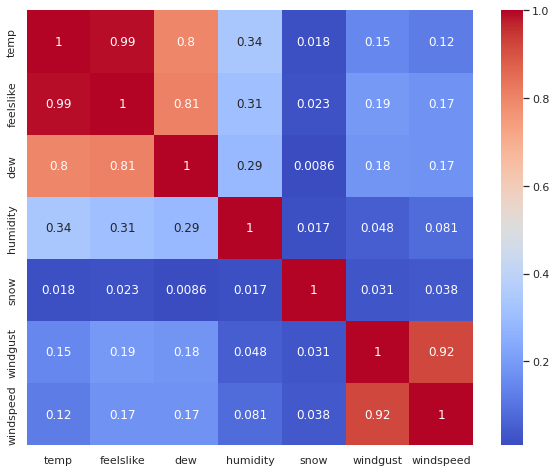

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(Del_col.corr()),cmap='coolwarm',annot=True)

In [ ]:
Del_col['Datetime_new'] = pd.to_datetime(Del_col['datetime'])
Del_col.head()

,datetime,temp,feelslike,dew,humidity,snow,windgust,windspeed,Datetime_new
0,2021-04-01T00:00:00,3.2,-0.5,-1.4,71.77,0,28.8,15.1,2021-04-01 00:00:00
1,2021-04-01T01:00:00,2.5,-1.8,-1.5,74.87,0,25.2,17.6,2021-04-01 01:00:00
2,2021-04-01T02:00:00,2.0,-2.4,-1.9,75.42,0,28.8,18.0,2021-04-01 02:00:00
3,2021-04-01T03:00:00,1.5,-3.1,-2.2,76.70,0,28.8,18.2,2021-04-01 03:00:00
4,2021-04-01T04:00:00,1.0,-3.2,-2.2,79.39,0,25.8,15.0,2021-04-01 04:00:00


In [ ]:
#Adding_date_colum

In [ ]:
add_col = pd.DatetimeIndex(Del_col['datetime'])

Del_col['W_Year']= add_col.year
Del_col['W_Month']=add_col.month
Del_col['W_Day'] = add_col.day
Del_col['W_days'] = add_col.day_name()
Del_col['W_hour'] = add_col.hour
Del_col.head()

,datetime,temp,feelslike,dew,humidity,snow,windgust,windspeed,Datetime_new,W_Year,W_Month,W_Day,W_days,W_hour
0,2021-04-01T00:00:00,3.2,-0.5,-1.4,71.77,0,28.8,15.1,2021-04-01 00:00:00,2021,4,1,Thursday,0
1,2021-04-01T01:00:00,2.5,-1.8,-1.5,74.87,0,25.2,17.6,2021-04-01 01:00:00,2021,4,1,Thursday,1
2,2021-04-01T02:00:00,2.0,-2.4,-1.9,75.42,0,28.8,18.0,2021-04-01 02:00:00,2021,4,1,Thursday,2
3,2021-04-01T03:00:00,1.5,-3.1,-2.2,76.70,0,28.8,18.2,2021-04-01 03:00:00,2021,4,1,Thursday,3
4,2021-04-01T04:00:00,1.0,-3.2,-2.2,79.39,0,25.8,15.0,2021-04-01 04:00:00,2021,4,1,Thursday,4


In [ ]:
Del_col.tail()

,datetime,temp,feelslike,dew,humidity,snow,windgust,windspeed,Datetime_new,W_Year,W_Month,W_Day,W_days,W_hour
5132,2021-10-31T19:00:00,9.8,7.2,7.6,86.04,0,36.3,19.2,2021-10-31 19:00:00,2021,10,31,Sunday,19
5133,2021-10-31T20:00:00,9.8,6.9,7.6,86.35,0,36.3,22.3,2021-10-31 20:00:00,2021,10,31,Sunday,20
5134,2021-10-31T21:00:00,9.6,7.0,7.9,88.67,0,39.5,18.9,2021-10-31 21:00:00,2021,10,31,Sunday,21
5135,2021-10-31T22:00:00,9.7,7.1,8.4,91.66,0,36.0,18.8,2021-10-31 22:00:00,2021,10,31,Sunday,22
5136,2021-10-31T23:00:00,10.1,10.1,7.8,85.95,0,32.5,15.6,2021-10-31 23:00:00,2021,10,31,Sunday,23


In [ ]:
#merge_data

In [ ]:

df_merge = pd.merge_asof(df1_sort, Del_col, left_on='Departure_new', right_on='Datetime_new')
#df_merge = pd.merge_asof(copy_df1, Del_col, left_on='Departure_new', right_on='Datetime_new')
df_merge

,Departure,Return,Departure station id,Departure station name,Return station id,Return station name,Covered distance (m),Duration (sec.),Departure_new,Departure_Year,...,humidity,snow,windgust,windspeed,Datetime_new,W_Year,W_Month,W_Day,W_days,W_hour
0,2021-04-01 05:06:37,2021-04-01T17:57:32,9,Erottajan aukio,105,Tilkantori,5341.0,1606.0,2021-04-01 05:06:37,2021,...,81.37,0,21.7,12.0,2021-04-01 05:00:00,2021,4,1,Thursday,5
1,2021-04-01 06:05:17,2021-04-01T06:05:39,30,Itämerentori,30,Itämerentori,2.0,18.0,2021-04-01 06:05:17,2021,...,86.17,0,21.6,17.2,2021-04-01 06:00:00,2021,4,1,Thursday,6
2,2021-04-01 06:06:02,2021-04-01T06:11:19,68,Albertinkatu,26,Kamppi (M),977.0,323.0,2021-04-01 06:06:02,2021,...,86.17,0,21.6,17.2,2021-04-01 06:00:00,2021,4,1,Thursday,6
3,2021-04-01 06:06:04,2021-04-01T08:05:35,57,Lauttasaaren ostoskeskus,117,Brahen puistikko,0.0,7168.0,2021-04-01 06:06:04,2021,...,86.17,0,21.6,17.2,2021-04-01 06:00:00,2021,4,1,Thursday,6
4,2021-04-01 06:13:36,2021-04-01T06:21:53,133,Paavalinpuisto,126,Kalasatama (M),1760.0,493.0,2021-04-01 06:13:36,2021,...,86.17,0,21.6,17.2,2021-04-01 06:00:00,2021,4,1,Thursday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862097,2021-10-31 23:57:43,2021-10-31T23:59:31,133,Paavalinpuisto,133,Paavalinpuisto,330.0,NaN,2021-10-31 23:57:43,2021,...,85.95,0,32.5,15.6,2021-10-31 23:00:00,2021,10,31,Sunday,23
2862098,2021-10-31 23:58:30,2021-11-01T00:11:49,74,Rajasaarentie,30,Itämerentori,3206.0,NaN,2021-10-31 23:58:30,2021,...,85.95,0,32.5,15.6,2021-10-31 23:00:00,2021,10,31,Sunday,23
2862099,2021-10-31 23:58:50,2021-11-01T03:32:30,31,Marian sairaala,31,Marian sairaala,334.0,NaN,2021-10-31 23:58:50,2021,...,85.95,0,32.5,15.6,2021-10-31 23:00:00,2021,10,31,Sunday,23
2862100,2021-10-31 23:59:17,2021-11-01T00:35:34,543,Otaranta,30,Itämerentori,7177.0,NaN,2021-10-31 23:59:17,2021,...,85.95,0,32.5,15.6,2021-10-31 23:00:00,2021,10,31,Sunday,23


In [ ]:
df_merge.columns

Index(['Departure', 'Return', 'Departure station id', 'Departure station name',
       'Return station id', 'Return station name', 'Covered distance (m)',
       'Duration (sec.)', 'Departure_new', 'Departure_Year', 'Departure_Month',
       'Departure_Day', 'Week_days', 'Departure_hour', 'Departure_minutes',
       'hour', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'snow',
       'windgust', 'windspeed', 'Datetime_new', 'W_Year', 'W_Month', 'W_Day',
       'W_days', 'W_hour'],
      dtype='object')

In [ ]:
df_merge.shape

(2862102, 30)

In [ ]:
df_merge.drop(df_merge.columns[[6,7,8,10,13,14,15,16,17,18,19,20,21,22,23]],axis=1,inplace=True)

In [ ]:
df_merge.reset_index(inplace=True)

<AxesSubplot:xlabel='temp', ylabel='count'>

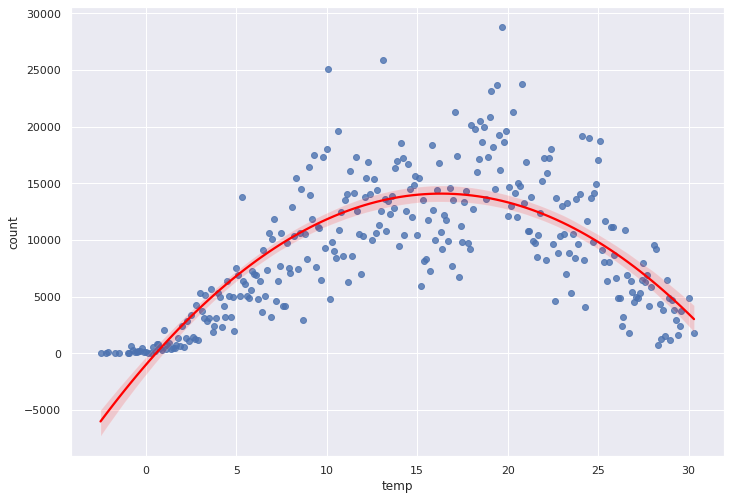

In [ ]:
#pickup_temp
temp_count_df = DataFrame({'count' : df_merge.groupby( ['temp']).size()}).reset_index()
sns.regplot(x=temp_count_df['temp'], y=temp_count_df['count'], line_kws={"color": "red"}, order=2)



<AxesSubplot:xlabel='humidity', ylabel='count'>

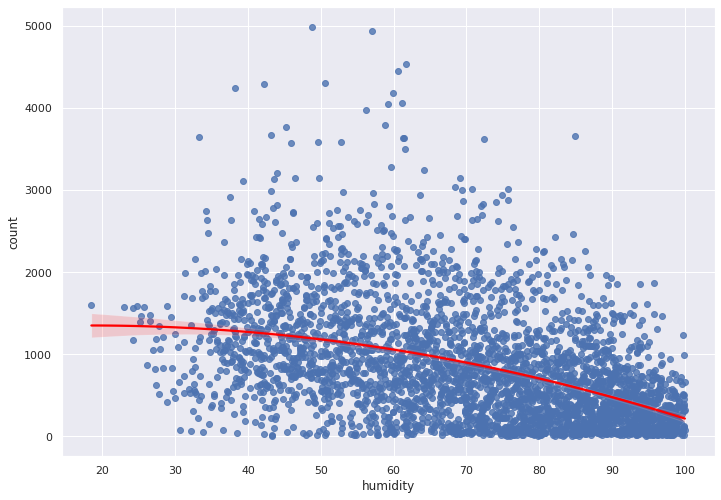

In [ ]:
#pickup_humidity
humidity_count_df = DataFrame({'count' : df_merge.groupby( ['humidity']).size()}).reset_index()
sns.regplot(x=humidity_count_df['humidity'], y=humidity_count_df['count'], line_kws={"color": "red"}, order=2)

<AxesSubplot:xlabel='dew', ylabel='count'>

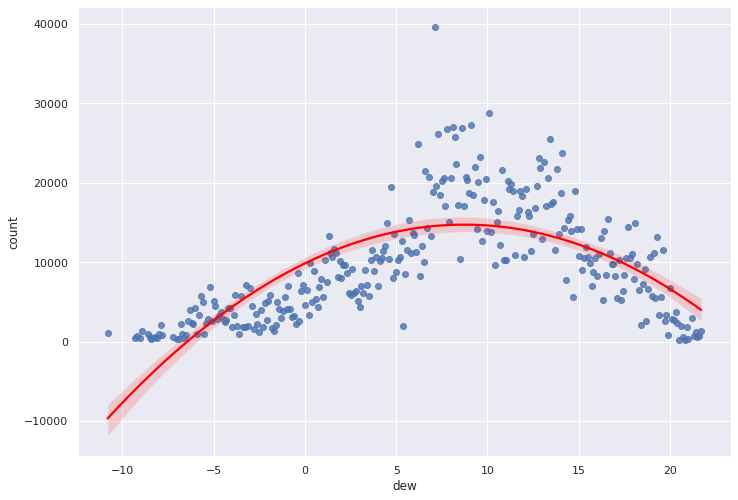

In [ ]:
#pickup_dew
dew_count_df = DataFrame({'count' : df_merge.groupby( ['dew']).size()}).reset_index()
sns.regplot(x=dew_count_df['dew'], y=dew_count_df['count'], line_kws={"color": "red"}, order=2)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

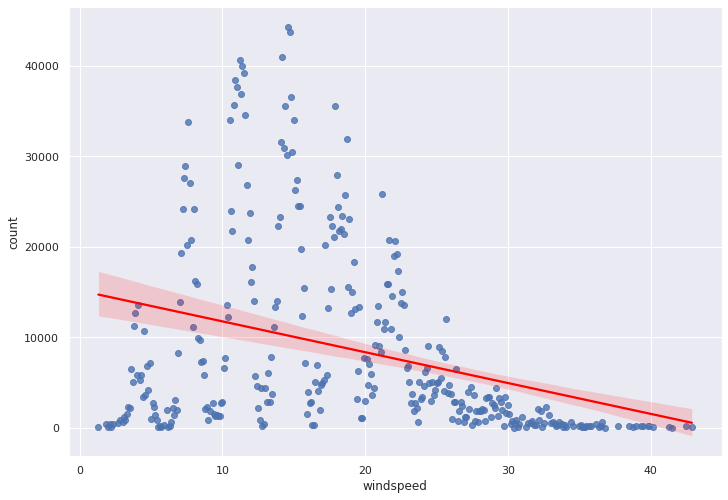

In [ ]:
#pickup_windspeed
windspeed_count_df = DataFrame({'count' : df_merge.groupby( ['windspeed']).size()}).reset_index()
sns.regplot(x=windspeed_count_df['windspeed'], y=windspeed_count_df['count'], line_kws={"color": "red"}, order=1)

In [ ]:
snow_count_df = DataFrame({'count' : df_merge.groupby( ['snow']).size()}).reset_index()
# sns.regplot(x=snow_count_df['snow'], y=snow_count_df['count'], line_kws={"color": "red"}, order=2)
snow_count_df

,snow,count
0,0,2861798
1,1,304
